<a href="https://colab.research.google.com/github/Hardikr23/tensorflow_codes/blob/main/CNN_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0



4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4902 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3694 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3335 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3119 - accuracy: 0.8869
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2958 - accuracy: 0.8910

MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8788


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.ops.gen_nn_ops import Conv2D
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                          keras.layers.Conv2D(32, (3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2,2),
                          
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3793 - accuracy: 0.8616
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3015 - accuracy: 0.8900
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2663 - accuracy: 0.9013
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2399 - accuracy: 0.9112
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2178 - accuracy: 0.9181


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)              

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.2661 - accuracy: 0.9030


[0.2660873532295227, 0.902999997138977]

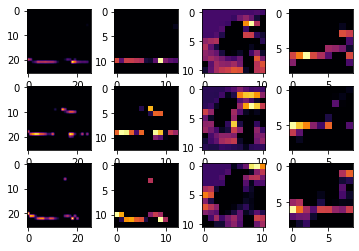

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)